# Big Picture

SVM is based on the idea of finding a hyperplane that best divides a dataset into different classes. Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. SVM should be a good choice for this data set because there is more than just one lable that my data can be classified into. This makes my data more complex to did analysis on. SVM can handle this added complexity very well.

In [46]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

# Get the Data

When I downloaded this dataset, there was a title above the excel table in the csv file. This meant that everything was listed under just one column, even though there were quite a few. I did not know how to remove this using python, so I manually altered the CSV file.

ORIGINAL FILE: https://drive.google.com/file/d/1eFANBlT7BYG2JP_O99e_Rp48lsVnmWAL/view?usp=sharing

ALTERED FILE: https://drive.google.com/file/d/1_i8FFpnvGF7DmEpfoeL_E1vH7JUqYoWX/view?usp=sharing

Size: 1.3MB
Entries: 10000
Features: 18

In [47]:
space = pd.read_csv("Space_Altered.csv")

In [48]:
space.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [49]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.3+ MB


In [50]:
space.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


The reason that I dropped these features is because while I was examining and researching this dataset, I found out these are completely useless to the 'class' feature.

The features 'run', 'rerun', 'camcol' and 'field' are values which describe parts of the camera at the moment, and 'objid' and 'specobjid' are just identifiers.

In [51]:
space.drop(['objid', 'specobjid', 'run', 'rerun', 'camcol', 'plate', 'mjd', 'fiberid', 'field'], axis=1, inplace=True)

In [52]:
space.head()

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590


In [53]:
space.corr()

,ra,dec,u,g,r,i,z,redshift
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,0.030307
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.067021
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034
redshift,0.030307,0.067021,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000


# Non-linear Separation Visualization / Sclaing With PCA

I also used PCA to do some dimentionality reduction because the g r i and z features were all very closely related, so I combined them into a single feature.

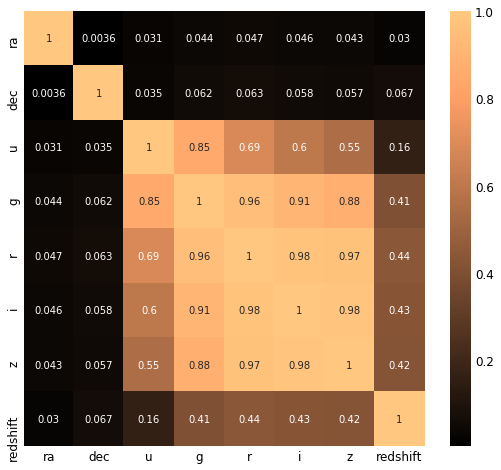

In [54]:
f, ax = plt.subplots(1, figsize=(8,8))
sns.heatmap(space.corr(), annot=True, ax=ax, cmap='copper')

In [55]:
pca_val = space[['g', 'r', 'i', 'z']]
pca = PCA(n_components=1)
pca_val = pca.fit_transform(pca_val)
pca_val = pca_val.reshape(-1,)

In [56]:
pca_val = pd.Series(pca_val, name='Combined_Vals')
space = pd.concat([space, pca_val], axis=1)
space.drop(['g', 'r', 'i', 'z'], axis=1, inplace=True)
space.head()

,ra,dec,u,class,redshift,Combined_Vals
0,183.531326,0.089693,19.47406,STAR,-0.000009,-1.809151
1,183.598371,0.135285,18.66280,STAR,-0.000055,-0.214012
2,183.680207,0.126185,19.38298,GALAXY,0.123111,1.128840
3,183.870529,0.049911,17.76536,STAR,-0.000111,-1.259402
4,183.883288,0.102557,17.55025,STAR,0.000590,-0.570706


In [57]:
space.corr()

,ra,dec,u,redshift,Combined_Vals
ra,1.000000,0.003596,0.031238,0.030307,0.045734
dec,0.003596,1.000000,0.035279,0.067021,0.060863
u,0.031238,0.035279,1.000000,0.163741,0.665446
redshift,0.030307,0.067021,0.163741,1.000000,0.435253
Combined_Vals,0.045734,0.060863,0.665446,0.435253,1.000000


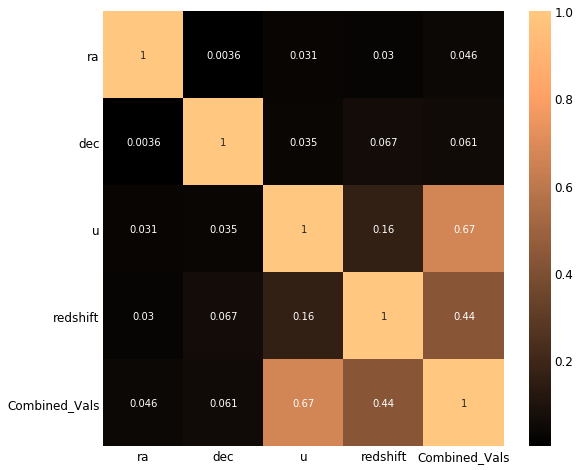

In [58]:
f, ax = plt.subplots(1, figsize=(8,8))
sns.heatmap(space.corr(), annot=True, ax=ax, cmap='copper')

We can see that RA and DEC do not are not really dependent on the other features. Lets plot them out to show that the data is not very linear. As you can see, the different classes are very much spread out, meaning that the data is not very linear. All the classes are mingling with each other. I will plat out a few other features just to see what they look like.

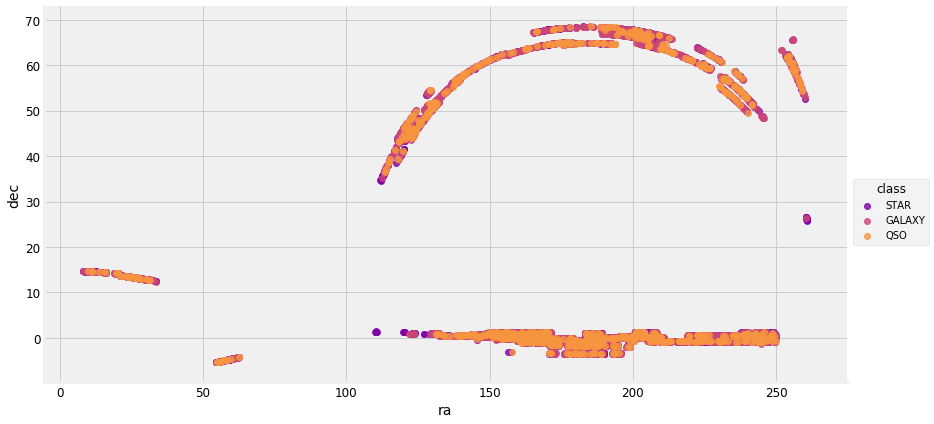

In [59]:
sns.lmplot(x='ra', y='dec', data=space, hue='class', fit_reg=False, palette='plasma', size=6, aspect=2)

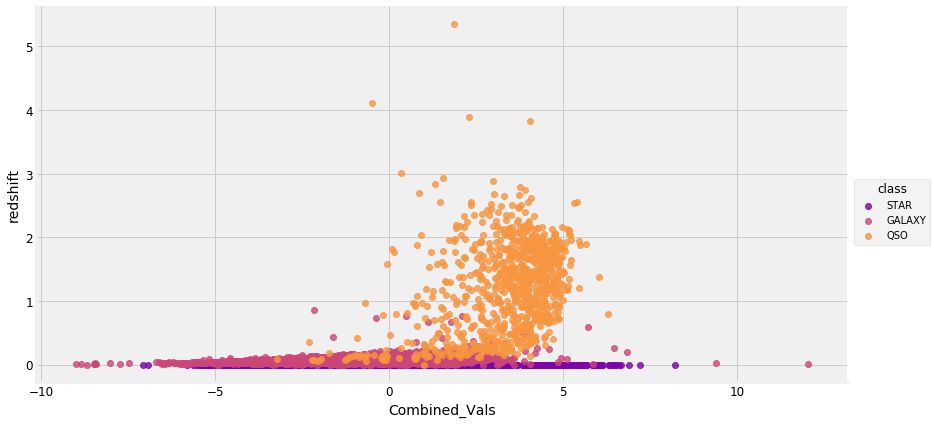

In [60]:
sns.lmplot(x='Combined_Vals', y='redshift', data=space, hue='class', fit_reg=False, palette='plasma', size=6, aspect=2)

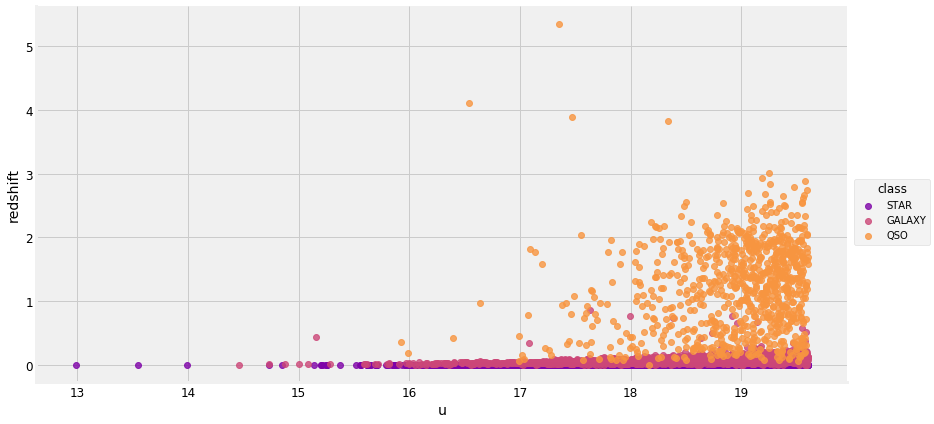

In [61]:
sns.lmplot(x='u', y='redshift', data=space, hue='class', fit_reg=False, palette='plasma', size=6, aspect=2)

In [62]:
X = space.drop('class', axis=1)
y = space['class']
y.value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
labelENC = LabelEncoder()
y = labelENC.fit_transform(y)

In [65]:
y

array([2, 2, 0, ..., 2, 0, 0], dtype=int32)

# Basic SVMClassifier

In [66]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
print('Training set: ')
print('Accuracy: %{}'.format(accuracy_score(y_train, svm_model.predict(X_train))*100))
print('Classification report:\n{}'.format(classification_report(y_train, svm_model.predict(X_train))))
print('\nTest set: ')
print('Accuracy: %{}'.format(accuracy_score(y_test, svm_model.predict(X_test))*100))
print('Classification report:\n{}'.format(classification_report(y_test, svm_model.predict(X_test))))

Training set: 
Accuracy: %83.8625
Classification report:
             precision    recall  f1-score   support

     GALAXY       0.85      0.85      0.85      3999
        QSO       0.98      0.84      0.91       681
       STAR       0.80      0.82      0.81      3320

avg / total       0.84      0.84      0.84      8000


Test set: 
Accuracy: %77.3
Classification report:
             precision    recall  f1-score   support

     GALAXY       0.80      0.79      0.80       999
        QSO       0.92      0.68      0.78       169
       STAR       0.72      0.77      0.74       832

avg / total       0.78      0.77      0.77      2000



# SGDClassifier

In [67]:
SGD_model = SGDClassifier(random_state=42)

In [68]:
SGD_model.fit(X_train, y_train)
print('Training set: ')
print('Accuracy: %{}'.format(accuracy_score(y_train, SGD_model.predict(X_train))*100))
print('Classification report:\n{}'.format(classification_report(y_train, SGD_model.predict(X_train))))
print('\nTest set: ')
print('Accuracy: %{}'.format(accuracy_score(y_test, SGD_model.predict(X_test))*100))
print('Classification report:\n{}'.format(classification_report(y_test, SGD_model.predict(X_test))))

Training set: 
Accuracy: %41.425
Classification report:
             precision    recall  f1-score   support

     GALAXY       0.43      0.02      0.03      3999
        QSO       0.87      0.03      0.06       681
       STAR       0.41      0.97      0.58      3320

avg / total       0.46      0.41      0.26      8000


Test set: 
Accuracy: %41.449999999999996
Classification report:
             precision    recall  f1-score   support

     GALAXY       0.46      0.02      0.03       999
        QSO       0.00      0.00      0.00       169
       STAR       0.41      0.98      0.58       832

avg / total       0.40      0.41      0.26      2000



c:\users\george\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\george\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Improved SVMClassifier With rbf Kernel

Through playing around with this part of the code, I found that increasing the C value but decreasing the gamma value gave me better and more accurate results

In [69]:
svm_model = SVC(C=750, gamma=0.001, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
print('Training set: ')
print('Accuracy: %{}'.format(accuracy_score(y_train, svm_model.predict(X_train))*100))
print('Classification report:\n{}'.format(classification_report(y_train, svm_model.predict(X_train))))
print('\nTest set: ')
print('Accuracy: %{}'.format(accuracy_score(y_test, svm_model.predict(X_test))*100))
print('Classification report:\n{}'.format(classification_report(y_test, svm_model.predict(X_test))))

Training set: 
Accuracy: %93.0375
Classification report:
             precision    recall  f1-score   support

     GALAXY       0.95      0.91      0.93      3999
        QSO       0.99      0.92      0.95       681
       STAR       0.90      0.96      0.93      3320

avg / total       0.93      0.93      0.93      8000


Test set: 
Accuracy: %91.9
Classification report:
             precision    recall  f1-score   support

     GALAXY       0.95      0.89      0.92       999
        QSO       0.96      0.92      0.94       169
       STAR       0.88      0.96      0.92       832

avg / total       0.92      0.92      0.92      2000



# Solution

As you can see from all the data above, SVM is far superior to to SGD classifier. This is because SGD is literally random, hence the word "stochastic" in the name. The main thing that I learned throughout this project is that objects in space and actually be pretty accuratly predicted without having a whole lot of knowledge about it.

# Plans For The Future

I do not think that I need more data, I believe there is a good amount. I also think that my model is pretty good for the future, assuming that our knowledge of galaxies and stars do not change very much any time soon. The only thing that might be able to be improved is more messing with the C and gamma values for the SVM to find the best possible solution.

In [70]:
from sklearn.ensemble import BaggingClassifier